In [2]:
import numpy as np
import pandas as pd
from hmmlearn import hmm



In [3]:
data = pd.read_csv('../data/GDELT_THA.csv')
print(len(data))

731154


In [3]:
data = pd.read_csv('../data/GDELT_THA.csv')

data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

data.drop(columns=['Date'], inplace=True)

data['Source'] = data['Source'].astype('category')
data['Target'] = data['Target'].astype('category')

print(data.tail())



        Source  Target  CAMEOCode  NumEvents  NumArts  QuadClass  Goldstein  \
731149  USACVL     THA         40          1       20          1        1.0   
731150  USAMED     THA         70          1        2          2        7.0   
731151  USAMED  THAMED         70          1        2          2        7.0   
731152     USA     THA         61          3       15          2        6.4   
731153     VNM     THA        160          1        2          4       -4.0   

        SourceGeoType  SourceGeoLat  SourceGeoLong  TargetGeoType  \
731149            1.0       38.0000       -97.0000            4.0   
731150            4.0       32.9049        35.8072            4.0   
731151            4.0       13.7500       100.5170            4.0   
731152            1.0       38.0000       -97.0000            1.0   
731153            4.0       10.7500       106.6670            1.0   

        TargetGeoLat  TargetGeoLong  ActionGeoType  ActionGeoLat  \
731149       25.0000        45.0000       

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Source_encoded'] = label_encoder.fit_transform(data['Source'])
data['Target_encoded'] = label_encoder.fit_transform(data['Target'])
data.drop(columns=['Source', "Target"], inplace=True)
data.head(15)

,CAMEOCode,NumEvents,NumArts,QuadClass,Goldstein,SourceGeoType,SourceGeoLat,SourceGeoLong,TargetGeoType,TargetGeoLat,TargetGeoLong,ActionGeoType,ActionGeoLat,ActionGeoLong,Year,Month,Day,Source_encoded,Target_encoded
0,80,2,6,2,5.0,1.0,13.0000,105.0000,1.0,13.0000,105.0000,1.0,13.0000,105.0000,1979,1,2,1799,2723
1,51,1,2,1,3.4,1.0,35.0000,38.0000,4.0,33.3386,44.3939,4.0,33.3386,44.3939,1979,1,2,1976,2971
2,10,1,2,1,0.0,4.0,11.9934,105.4640,4.0,62.2333,145.5000,4.0,62.2333,145.5000,1979,1,4,1048,2723
3,130,1,9,3,-4.4,4.0,11.5500,104.9170,4.0,16.9520,99.9777,4.0,16.9520,99.9777,1979,1,4,1048,2723
4,190,1,6,4,-10.0,4.0,11.5500,104.9170,4.0,11.5500,104.9170,4.0,11.5500,104.9170,1979,1,4,1048,2723
5,43,1,3,1,2.8,4.0,17.9667,102.6000,4.0,17.9667,102.6000,4.0,17.9667,102.6000,1979,1,4,1142,2723
6,43,2,6,1,2.8,4.0,17.9667,102.6000,4.0,17.9667,102.6000,4.0,17.9667,102.6000,1979,1,4,1142,2749
7,42,1,6,1,1.9,4.0,48.3753,41.6275,4.0,48.3753,41.6275,4.0,48.3753,41.6275,1979,1,4,2002,1880
8,72,3,7,2,8.3,4.0,16.9520,99.9777,4.0,16.9520,99.9777,4.0,21.0333,105.8500,1979,1,4,1976,1785
9,73,2,2,2,7.4,4.0,11.5500,104.9170,4.0,11.5500,104.9170,4.0,11.5500,104.9170,1979,1,4,1976,1785


In [11]:

data.to_csv("../data/GDELT_THA_num.csv")

In [5]:
data = pd.read_csv('../data/GDELT_THA_num.csv')

data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])

filtered_data = data[data['CAMEOCode'].astype(str).str.startswith('14')]

grouped_data = filtered_data.groupby('Date')['NumEvents'].sum().reset_index()

grouped_data['RollingMean_90days'] = grouped_data['NumEvents'].rolling(window=90, min_periods=1).mean()

grouped_data['Ratio'] = grouped_data['NumEvents'] / grouped_data['RollingMean_90days']
M_at = np.sum(grouped_data['Ratio'])/len(grouped_data)
grouped_data['Ratio/7'] = grouped_data['Ratio']/7

print(grouped_data)
# print(M_at)

           Date  NumEvents  RollingMean_90days     Ratio   Ratio/7
0    1979-01-12          2            2.000000  1.000000  0.142857
1    1979-01-15          1            1.500000  0.666667  0.095238
2    1979-02-07          1            1.333333  0.750000  0.107143
3    1979-02-08          2            1.500000  1.333333  0.190476
4    1979-02-12          1            1.400000  0.714286  0.102041
...         ...        ...                 ...       ...       ...
4528 2014-02-13         16           23.177778  0.690316  0.098617
4529 2014-02-14         15           23.255556  0.645007  0.092144
4530 2014-02-15         17           23.388889  0.726841  0.103834
4531 2014-02-16         15           23.533333  0.637394  0.091056
4532 2014-02-17         26           23.722222  1.096019  0.156574

[4533 rows x 5 columns]


In [2]:
import pandas as pd
from tqdm import tqdm

data = pd.read_csv('../data/GDELT_THA_num.csv')

data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])

filtered_data = data[data['CAMEOCode'].astype(str).str.startswith('14')]

rolling_sums = []

for date in tqdm(filtered_data['Date'], desc="Calculating Rolling Sums"):
    start_date = date - pd.Timedelta(days=3)
    end_date = date + pd.Timedelta(days=3)
    
    window_data = filtered_data[(filtered_data['Date'] >= start_date) & (filtered_data['Date'] <= end_date)]
    window_sum = window_data['NumEvents'].sum()
    
    rolling_sum = window_sum / 7
    
    rolling_sums.append(rolling_sum)

filtered_data['R14'] = rolling_sums

print(filtered_data)


Calculating Rolling Sums: 100%|██████████| 16078/16078 [00:11<00:00, 1457.72it/s]

        Unnamed: 0  CAMEOCode  NumEvents  NumArts  QuadClass  Goldstein  \
140            140         14          2        9          1        0.0   
220            220         14          1        7          1        0.0   
461            461         14          1        8          1        0.0   
494            494         14          2        2          1        0.0   
519            519        141          1       10          3       -6.5   
...            ...        ...        ...      ...        ...        ...   
731020      731020         14          1        3          1        0.0   
731035      731035        141          3       40          3       -6.5   
731106      731106        145          1       32          3       -7.5   
731126      731126        141          2       21          3       -6.5   
731145      731145        141          1       10          3       -6.5   

        SourceGeoType  SourceGeoLat  SourceGeoLong  TargetGeoType  ...  \
140               NaN    


C:\Users\tomek\AppData\Local\Temp/ipykernel_16660/1506283913.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['R14'] = rolling_sums


In [10]:
filtered_data.to_csv("filtered_data.csv")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


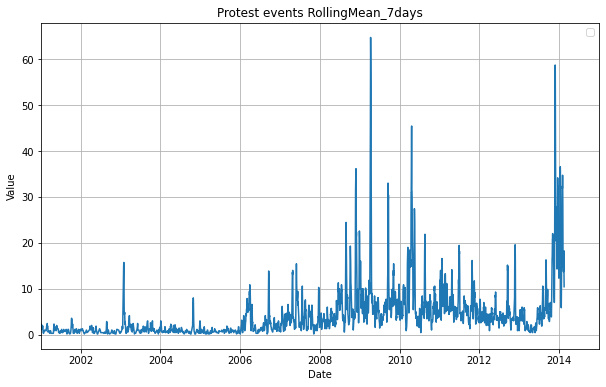

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Date'], filtered_data['R14'])
# plt.plot(grouped_data['Date'], grouped_data['RollingMean_90days'], label='RollingMean_90days')
# plt.plot(grouped_data['Date'], grouped_data['NumEvents'], label='NumEvents')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xlim(pd.to_datetime('2001-01-01'), pd.to_datetime('2015-01-01'))
plt.title('Protest events RollingMean_7days')
plt.legend()
plt.grid(True)
plt.show()


In [1]:
import pandas as pd
import numpy as np
df_f = pd.read_csv("../data/GDELT-2017_THA_filtered.csv")

In [2]:
import pandas as pd
import numpy as np
dataframe = df_f.copy()

selected_event_code = 14
selected_events = dataframe[dataframe['EventRootCode'] == selected_event_code]

daily_counts = selected_events.groupby('SQLDATE').size()

daily_counts = daily_counts.fillna(0)

rolling_avg = daily_counts.rolling(window=90).mean()
normalized_counts = daily_counts / rolling_avg

normalized_counts = normalized_counts.fillna(0)

moving_avg = normalized_counts.rolling(window=7).mean().fillna(0)

mean_moving_avg = moving_avg.mean()
std_moving_avg = moving_avg.std()
threshold = mean_moving_avg + 2.576 * std_moving_avg

significant_events = moving_avg[moving_avg > threshold]

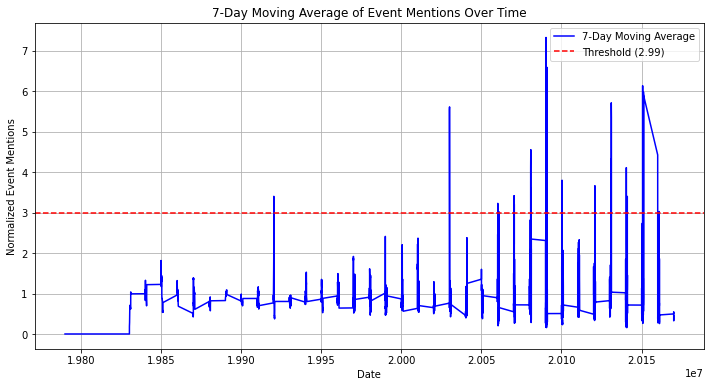

In [3]:
import matplotlib.pyplot as plt

moving_avg = moving_avg.sort_index()

plt.figure(figsize=(12, 6))
plt.plot(moving_avg.index, moving_avg, label='7-Day Moving Average', color='blue')
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold ({threshold:.2f})')

plt.xlabel('Date')
plt.ylabel('Normalized Event Mentions')
plt.title('7-Day Moving Average of Event Mentions Over Time')
plt.legend()
plt.grid(True)

plt.show()